In [1]:
import pandas as pd
import sqlite3

from fm.data_processor import DataProcessor
from fm import db, const

In [2]:
dp = DataProcessor(const.DATA_FILE)
dp.readCsv(parse_dates=['Date'])

transactions = dp.dataFrame

In [3]:
def read_csv(*args, **kwargs):
    return pd.read_csv(const.DATA_FILE, *args, **kwargs)

transactions = read_csv( parse_dates=['Date'])
transactions.columns = transactions.columns.str.strip()
transactions.columns = transactions.columns.str.replace(' ', '_')

transactions.loc[transactions.Description == 'Xoom', ['Category']] = 'Transfer to INDIA'

In [4]:
transactions.head()
transactions.dtypes

Date                    datetime64[ns]
Description                     object
Original_Description            object
Amount                         float64
Transaction_Type                object
Category                        object
Account_Name                    object
Labels                         float64
Notes                          float64
dtype: object

In [5]:
transDB = db.Database(const.DB_NAME, const.DATABASE , const.DATA_FILE)
transDB.createDatabaseFromDataFrame(const.TABLE_NAME, transactions)

In [6]:
conn = sqlite3.connect(const.DATABASE)
df = pd.read_sql_query("select * from transactions;", conn)
df.dtypes

index                     int64
Date                     object
Description              object
Original_Description     object
Amount                  float64
Transaction_Type         object
Category                 object
Account_Name             object
Labels                   object
Notes                    object
dtype: object

In [7]:
df.sort_values(ascending=False, by='Date', inplace=True)
df.head(10)

,index,Date,Description,Original_Description,Amount,Transaction_Type,Category,Account_Name,Labels,Notes
0,0,2019-01-24 00:00:00,Abc Westca,ABC*WESTCA,49.00,debit,Gym,Cash rewards credit card,None,None
3,3,2019-01-24 00:00:00,Amazon,AMZN Pickup,16.45,debit,Shopping,Cash rewards credit card,None,None
1,1,2019-01-24 00:00:00,Uber.com,UBR* PENDING.UBER.COM,6.65,debit,Rental Car & Taxi,Cash rewards credit card,None,None
2,2,2019-01-24 00:00:00,Aramark,ARAMARK CISCO THE QUARTER,6.16,debit,Food & Dining,Cash rewards credit card,None,None
6,6,2019-01-23 00:00:00,Discover Bank,DISCOVER BANK DES:ETRANSFER ID:XXXXX79815 INDN...,6000.00,debit,Credit Card Payment,naren,None,None
7,7,2019-01-22 00:00:00,Safeway,THE MARKET (SAFEWAY) SAN JOSE CAAPPLE PAY ENDI...,10.41,debit,Groceries,Discover it Card,None,None
8,8,2019-01-22 00:00:00,Costco,COSTCO WHSE #0148 SAN JOSE CA,224.76,debit,Shopping,Cash rewards credit card,None,None
9,9,2019-01-22 00:00:00,Amazon,AMZN Mktp US*MB9CP8BM1 Amzn.com/billWA,16.33,debit,Shopping,Cash rewards credit card,None,None
10,10,2019-01-22 00:00:00,Aum,AUM DES:PAYMENT ID:XXXXX90617 INDN:Naren Mudiv...,104.63,debit,Utilities,naren,None,None
15,15,2019-01-21 00:00:00,Scoop Tech Weekly,SCOOP TECH INC WEEKLY 14159429122 CA,2.00,debit,Auto & Transport,Cash rewards credit card,None,None


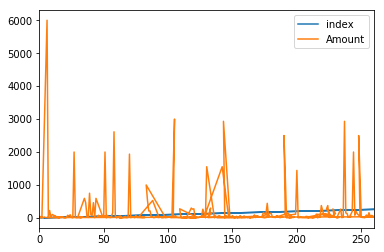

In [8]:
%matplotlib inline
df.plot()

In [18]:
from fm import queries
from fm import utils
startDate, endDate = utils.getLastNdaysStartAndEndDate(7)
query="""
select sum(Amount) as amount, Category as category from transactions 
where 
transaction_type=='debit' 
group by Category;
"""
# query=queries.OVERALL_DATE_RANGE % (str(startDate), str(endDate))
print(query)


select sum(Amount) as amount, Category as category from transactions 
where 
transaction_type=='debit' 
group by Category;



In [15]:
_df1 = transDB.execute(query)

In [16]:
df1 = pd.DataFrame(_df1)
df1.head()

,amount,category
0,2.00,Auto & Transport
1,220.50,Auto Insurance
2,200.00,Babysitter & Daycare
3,5.00,Bank Fee
4,33.85,Books
